Jednym z klasycznych przykładów wykorzystania numerycznych metod całkowania i
różniczkowania jest układ kontrolno-sterujący typu PID (z ang. Proportional–Integral–
Derivative controller). W tym celu proponuje się skorzystanie z symulacji
podgrzewanego zbiornika z cieczą w celu stabilizacji temperatury, przyjmując założenia:

• ciecz jest podgrzewana grzałką o wydajności:
ΔT =P(t ,T )⋅Δt
gdzie podawana moc do zbiornika P zmienia się w czasie t i zależy od aktualnej
temperatury cieczy,

• straty mocy są wynikiem odprowadzania energii cieplnej do otoczenia oraz
czynników losowych o wydajności:
ΔT =−coeff∗(Δt +rand ())
gdzie współczynnik coeff opisuje „symbolicznie” sprawność odprowadzania energii
cieplnej do otoczenia, np. na drodze konwekcji naturalnej czy wymuszonej.

W ramach ćwiczenia:

• dobierz odpowiednie parametry kontrolera PID, tj. współczynniki K(Kp, Ki, Kd) tak,
aby uzyskać odpowiednią temperaturę cieczy w zbiorniku, np. po czasie 10 s:

• wykreśl zależność mocy doprowadzanej do grzejnika w funkcji czasu P=f(t),

• jako zadanie dodatkowe, zaproponuj algorytm automatycznego „strojenia” regulatora
PID, np. w przypadku zmiany ilości cieczy w zbiorniku czy sprawności
odprowadzania energii cieplnej do otoczenia na drodze konwekcji.

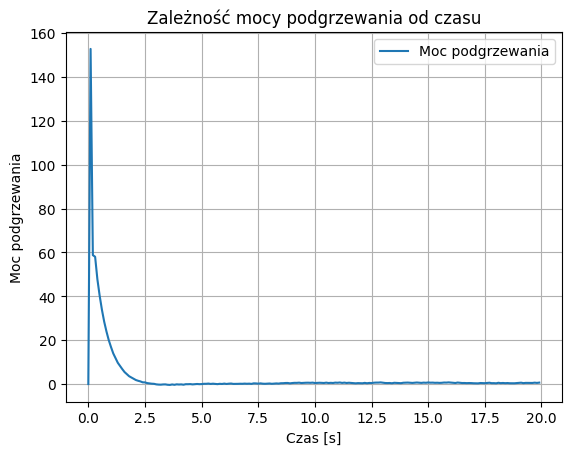

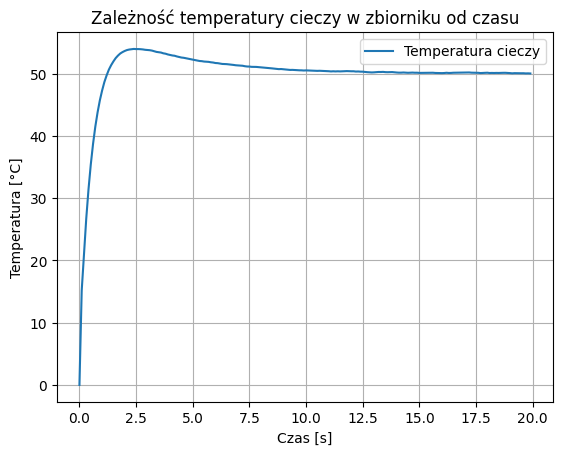

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parametry symulacji
t_max = 20  # Czas symulacji (s)
dt = 0.1  # Krok czasowy (s)

# Parametry kontrolera PID
Kp = 2.0
Ki = 0.5
Kd = 0.1

# Parametry podgrzewanego zbiornika
coeff = 0.1  # Współczynnik strat mocy

# Inicjalizacja zmiennych
t = np.arange(0, t_max, dt)
T = np.zeros_like(t)
P = np.zeros_like(t)

# Główna pętla symulacji
integral_error = 0
prev_error = 0
for i in range(1, len(t)):
    # Odpowiedź obiektu
    delta_T_object = -coeff * (dt + np.random.rand())
    # Bieżąca temperatura
    T[i] = T[i-1] + delta_T_object
    # Obliczenie błędu
    error = 50 - T[i]  # Temperatura zadana - bieżąca temperatura
    integral_error += error * dt
    derivative_error = (error - prev_error) / dt
    prev_error = error
    # Obliczenie sygnału sterującego
    P[i] = Kp * error + Ki * integral_error + Kd * derivative_error
    # Odpowiedź regulatora
    delta_T_regulator = P[i] * dt
    # Aktualizacja temperatury
    T[i] += delta_T_regulator

# Wykreślenie zależności mocy podgrzewania od czasu
plt.plot(t, P, label='Moc podgrzewania')
plt.xlabel('Czas [s]')
plt.ylabel('Moc podgrzewania')
plt.title('Zależność mocy podgrzewania od czasu')
plt.legend()
plt.grid(True)
plt.show()

# Wykreślenie zależności temperatury cieczy w zbiorniku od czasu
plt.plot(t, T, label='Temperatura cieczy')
plt.xlabel('Czas [s]')
plt.ylabel('Temperatura [°C]')
plt.title('Zależność temperatury cieczy w zbiorniku od czasu')
plt.legend()
plt.grid(True)
plt.show()
